In [1]:
import pandas as pd
import yellowbrick
import numpy as np

C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('F:/DSC 550/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['figure.figsize'] = (20, 10)

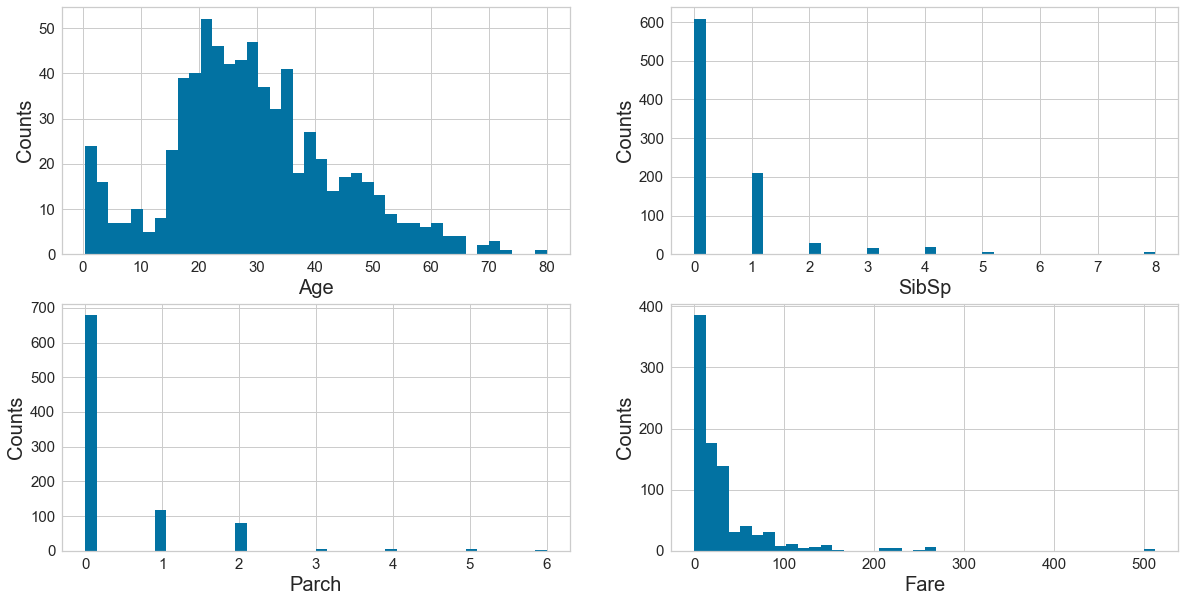

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

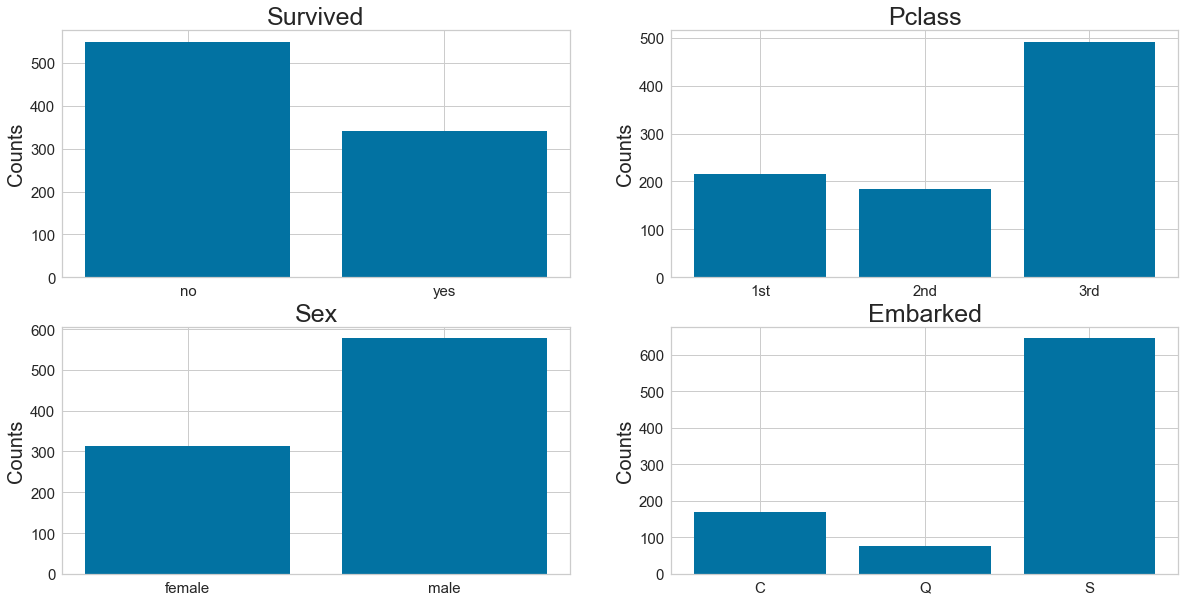

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
X_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

# Step 8: Pearson Ranking

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)

In [13]:
from yellowbrick.features import Rank2D

In [14]:
x = df[num_features].to_numpy()

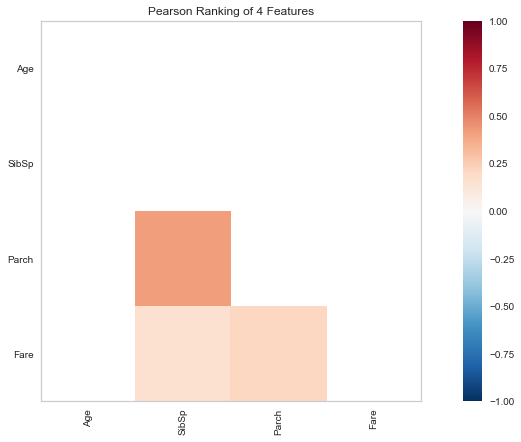

In [15]:
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(x)
visualizer.transform(x)
visualizer.poof(outpath="d://pcoords1.png") 
plt.show()

# Step 9:  Compare variables against Survived and Not Survived

In [16]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [17]:
from yellowbrick.style import set_palette
set_palette('sns_bright')

In [18]:
from yellowbrick.features import ParallelCoordinates

In [19]:
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

df_norm = df.copy()

for feature in num_features:
    df_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

In [20]:
X = df_norm[num_features].to_numpy()
y = df.Survived.to_numpy()

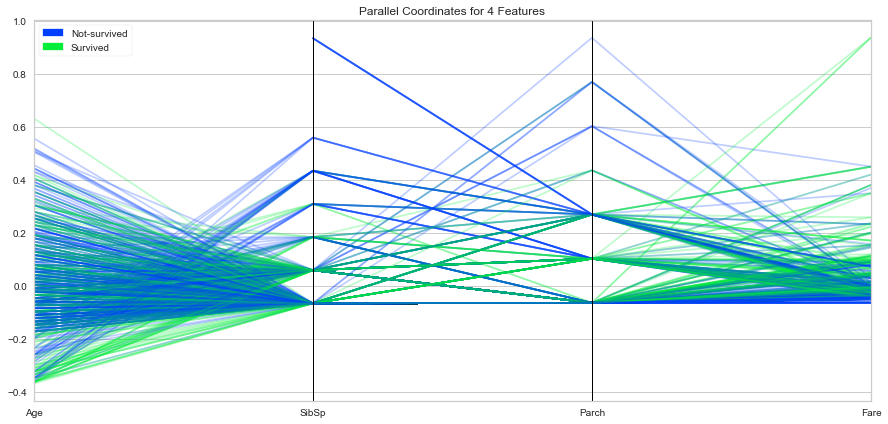

In [21]:
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof(outpath="d://pcoords2.png") 
visualizer.show()
plt.show()

# Step 10 - stacked bar charts to compare survived/not survived

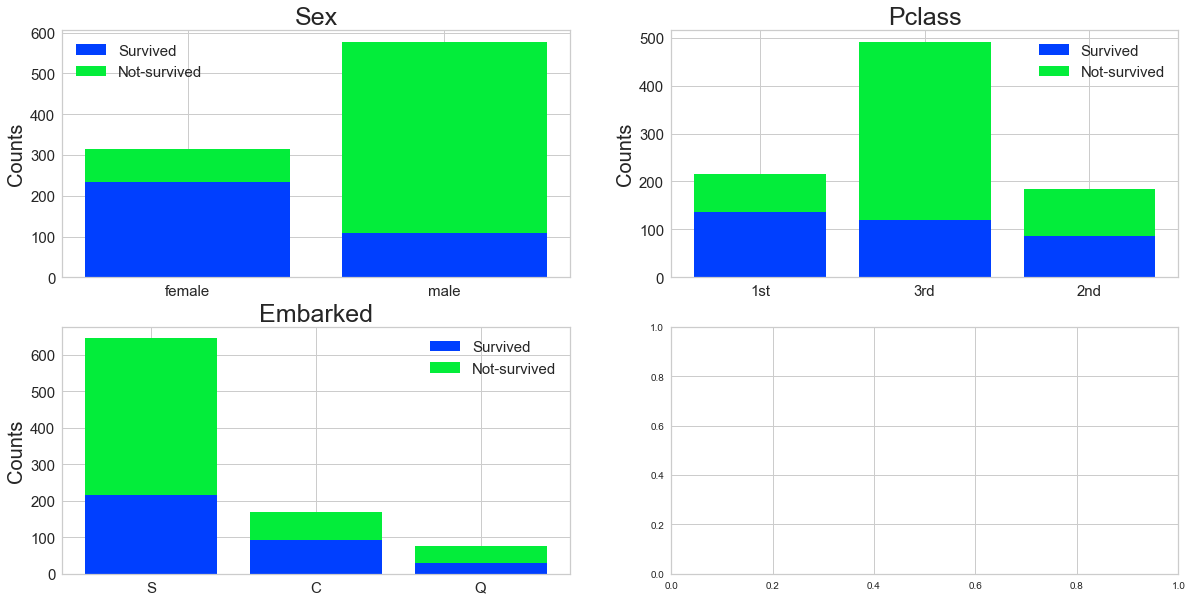

In [22]:
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 2, ncols = 2)
Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)


# Step 11 - fill in missing values and eliminate features

# Fill the missing age data with median value

In [23]:
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace)
fill_na_median(df['Age'])

df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# Fill with the most represented value

In [24]:
def fill_na_most(df, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [25]:
import numpy as np

In [26]:
def log_transformation(df):
    return df.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


# Step 12 - adjust skewed data (fare)

# Check the distribution using histogram

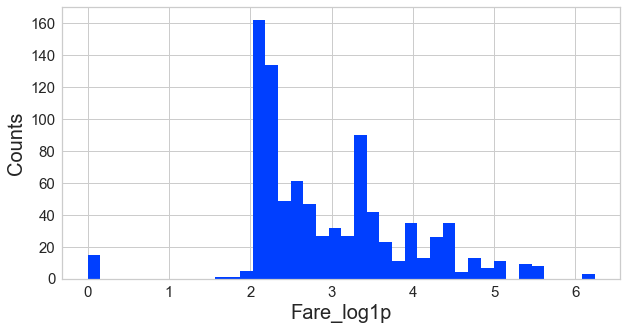

In [27]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

# Step 13 - convert categorical data to numbers

In [28]:
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head(8)

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1


# Step 14 - Create a whole features dataset that can be used for train and validation data splitting

# Here we will combine the numerical features and the dummie features together

In [31]:
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

In [32]:
data_model_y = df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [35]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  623
No. of samples in validation set: 268


In [36]:
# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())



No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


In [37]:
print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())



No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


# Step 15 - Eval Metrics

In [38]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [39]:
# Instantiate the classification model 
model = LogisticRegression()

C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


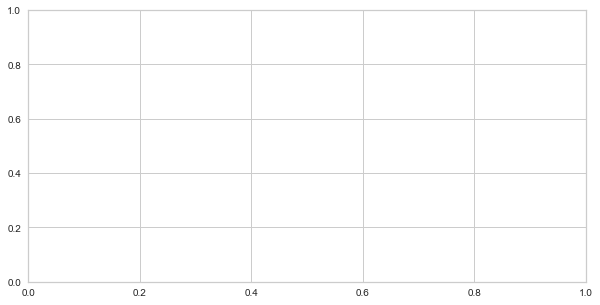

In [40]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

In [41]:
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000258DAFD4248>,
                classes=['Not_survived', 'Survived'],
                cmap=<matplotlib.colors.ListedColormap object at 0x00000258DB492A88>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

In [42]:
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

0.8432835820895522

In [43]:
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

In [44]:
#How did we do?
cm.poof()

In [45]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


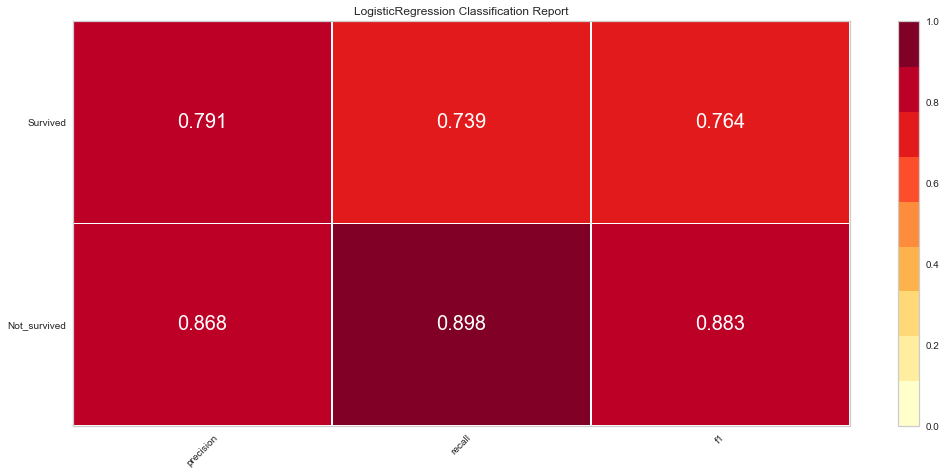

In [46]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

C:\Users\pro_v\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


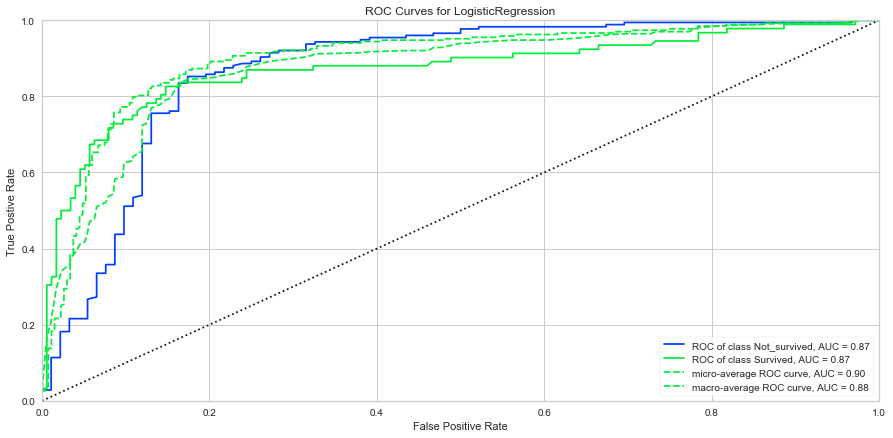

In [47]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# Chapter 16. Logistic Regression

# LR with L1 accuracy
# LR with L2 accuracy (NOTE:  change the penalty to "L2" in last section)

In [48]:
#load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
#Create the Datasets
# Load the iris dataset
iris = datasets.load_iris()

In [50]:
# Create X from the features
X = iris.data

# Create y from output
y = iris.target

In [51]:
#Display original data
print("Features:  ", X[0:5])
print ("Target:  ", y)

Features:   [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [52]:
# Remake the variable, keeping all data where the category is not 2.
X = X[y != 2]
y = y[y != 2]

In [54]:
#display features and target data
print("Features:  ", X[0:5])
print ("Target:  ", y)

Features:   [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
#split data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
#standardize features
# Create a scaler object
sc = StandardScaler()

In [57]:
# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

In [58]:
# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [59]:
#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

In [61]:
for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[ 0.3870594  -1.51285704  3.37100312  1.54390103]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 1
Coefficient of each feature: [[ 0.35603783 -0.82944655  2.14586262  0.90885119]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.1
Coefficient of each feature: [[ 0.25729642 -0.33871227  1.10613396  0.44604861]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.001
Coefficient of each feature: [[ 0.01390516 -0.01105764  0.04664354  0.01843987]]
Training accuracy: 1.0
Test accuracy: 1.0



# 17.1 Training a Linear Classifier

In [62]:
#load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [64]:
#Create the Datasets
# Load the iris dataset
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [65]:
#Display original data
print("Features:  ", features)
print ("Target:  ", target)

Features:   [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5

In [66]:
#create standardizer
standardizer=StandardScaler()
features_standardized = standardizer.fit_transform(features)

In [67]:
#create support vector classifier
svc=LinearSVC(C=1.0)

In [68]:
#Train Model
model = svc.fit(features_standardized, target)

In [69]:
from matplotlib import pyplot as plt

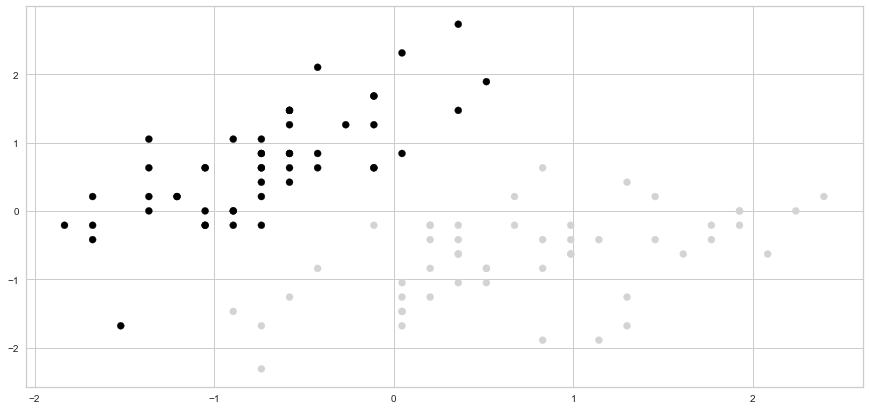

In [70]:
color=["black" if c==0 else "lightgrey" for c in target]

plt.scatter(features_standardized[:,0],features_standardized[:,1], c=color)

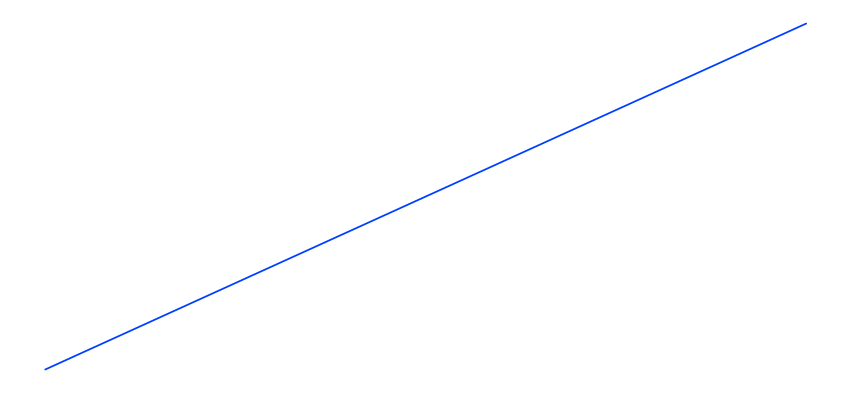

In [71]:
#create hyperplane
w=svc.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(svc.intercept_[0])/w[1]

plt.plot(xx,yy)
plt.axis("off"), plt.show();

# 18.3 Training a Naive Bayes Classifier for Binary Features

Albon, Chris. Machine Learning with Python Cookbook (p. 283). O'Reilly Media. Kindle Edition. 

In [72]:
# Load libraries
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [73]:
# Create three binary features
features = np.random.randint(2, size=(100, 3))

In [74]:
# Create a binary target vector
target = np.random.randint(2, size=(100, 1)).ravel()

In [75]:
# Create Bernoulli Naive Bayes object with prior probabilities of each class
classifer = BernoulliNB(class_prior=[0.25, 0.5])

In [76]:
# Train model
model = classifer.fit(features, target)
print(model)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.25, 0.5], fit_prior=True)
